## Задача 8.1 г) (3 задание)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rc('font', **{'size' : 22})


Решаем задачу $\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = f(x,y)$ на $\textbf{G}$

Где :
1) $\textbf{G} = [0,1]\times[0,1]$

2) $f(x,y) = -32( x(1 - x) + y(1 - y)) $

С условием $u |_{x,y \in \textbf{Г}}$

Где: 
1) $\textbf{Г} = \partial G $

Методом Якоби

С точностью $\varepsilon = 10^{-6}$

erorr < eps


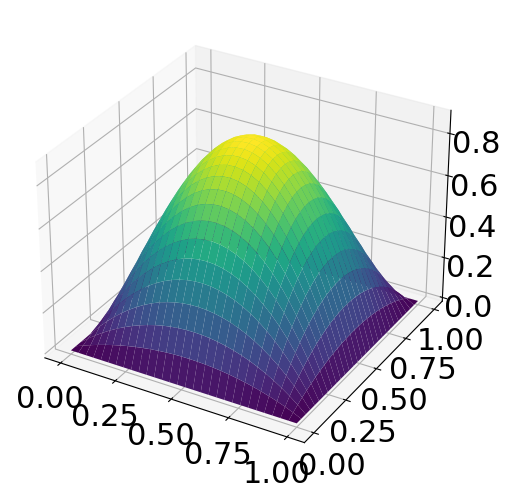

In [15]:
def solve_poisson_equation(f, n , m , epsilon=1e-5, max_iterations=10000):
    h_1 = 1.0 / (n + 1)
    h_2 = 1.0 / (m + 1)
    u = np.zeros((n, m))
    x = np.linspace(0, 1, n)
    t = np.linspace(0, 1, m)
    max_error = 0
    for iteration in range(max_iterations):
        u_new = np.copy(u)
        max_error = 0.0
        for i in range(1, n - 1):
            for j in range(1, m - 1 ):
                u_new[i, j] = 0.5 /(h_1**2+h_2**2) * ( h_1**2*u[i - 1, j ] + h_1**2*u[i + 1, j ] + h_2**2*u[i ,  j - 1] + h_2**2*u[i , j + 1] - h_1**2*h_2**2 * f(i * h_1, j * h_2))
                error = abs(u_new[i, j] - u[i, j])
                if error > max_error:
                    max_error = error
        if max_error < epsilon:
            print("erorr < eps")
            return x , t , u , max_error , iteration
        u = u_new
    print("max_iters limit")
    return x , t , u , max_error , max_iterations

def f(x, y):
    return -32 * (x * (1 - x) + y * (1 - y))

eps = 1e-6
n = 30

x , t , u  , er ,iter = solve_poisson_equation(f , n,n , epsilon = eps )

X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, T, u.T, cmap="viridis")

plt.show()

### В силу симметрии задачи - достаточно рассмотреть сходимость по шагу сетки по оси x

Как видим зависимость линейная

erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps
erorr < eps


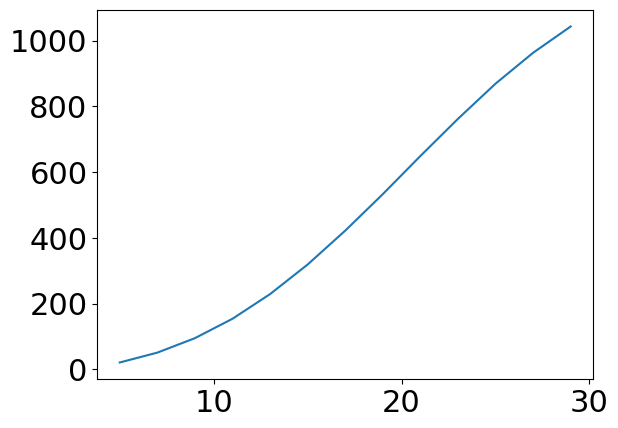

In [16]:

n_array = np.arange(5,30,2)
m = 30
eps = 1e-5

iters = []
for n in n_array :
    x , t , u  , er , iter = solve_poisson_equation(f , n, m , epsilon = eps )
    iters.append(iter)


plt.plot(n_array ,iters )
plt.show()